# OG with Singletons

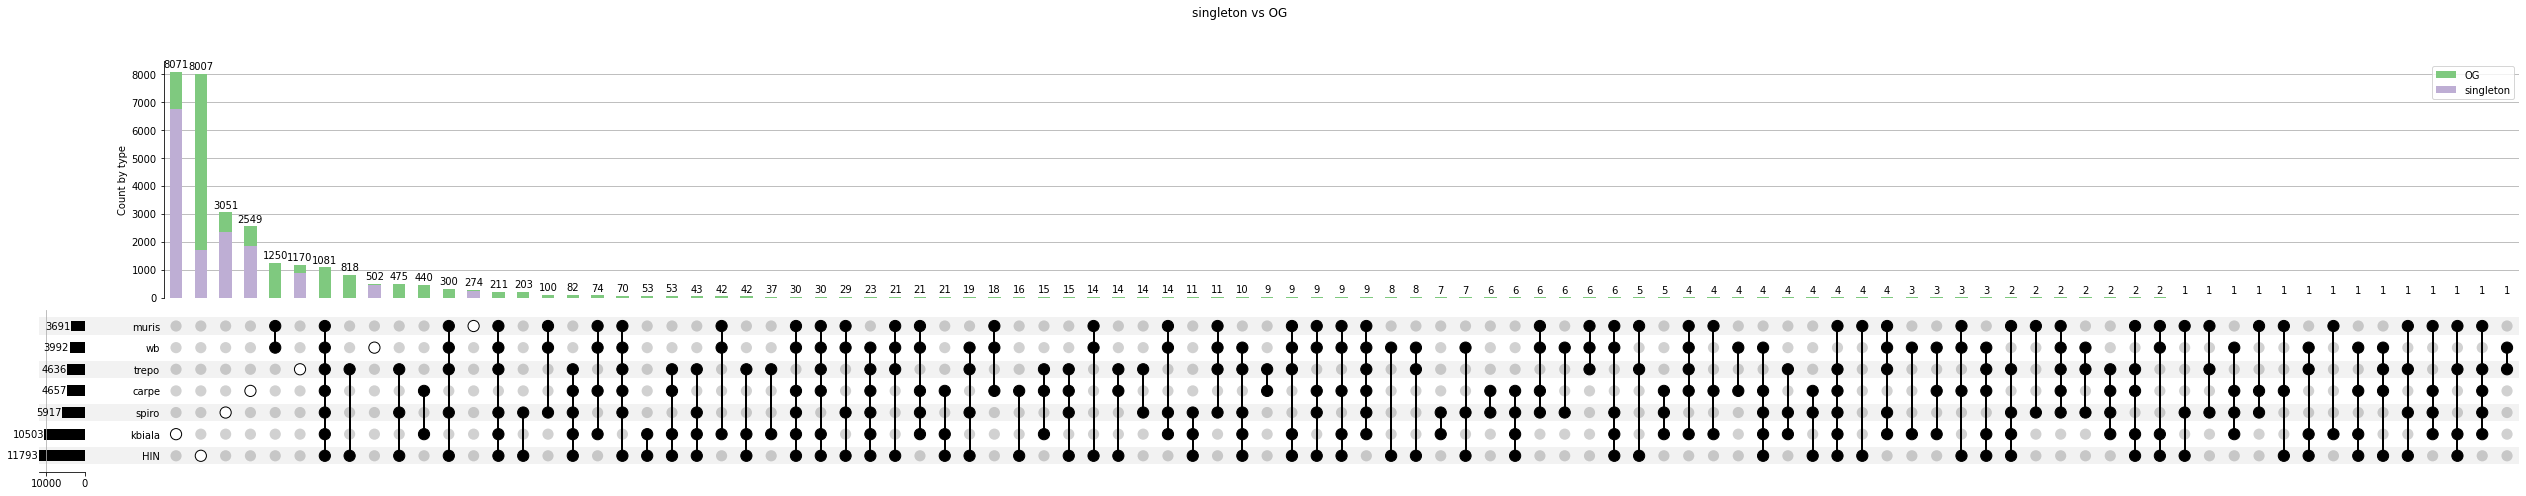

In [22]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"



"Single genes which are excluded from the OG"
df_sing = pd.read_csv("/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups_UnassignedGenes.tsv", sep="\t", header='infer')
df_sing = df_sing.set_index("Orthogroup").fillna(0)
df_sing["Total"] = 1
df_sing = df_sing.applymap(lambda x: 1 if isinstance(x, str) == True else x)

"Concatanate OG and singleton dataframes"
df_count_s = pd.concat([df_count, df_sing], axis=0)
df_count_s.loc[df_count_s["Total"] > 1, "Type"] = "OG"
df_count_s.loc[df_count_s["Total"] == 1, "Type"] = "singleton"

"Upset plot for both OG and singletons marked different colors"
df_stack = df_count_s.set_index(df_count_s.HIN >= 1).set_index(df_count_s.spiro >= 1, append=True).set_index(
    df_count_s.wb >= 1, append=True).set_index(df_count_s.muris >= 1, append=True).set_index(df_count_s.trepo >= 1, append=True
                                                                                             ).set_index(df_count_s.kbiala >= 1, append=True).set_index(df_count_s.carpe >= 1, append=True)

upset = UpSet(df_stack,
              intersection_plot_elements=0,
              show_counts=True, sort_categories_by="cardinality", sort_by="cardinality")  # disable the default bar chart

upset.add_stacked_bars(by="Type", colors=cm.Accent,
                       title="Count by type", elements=10)

upset.style_subsets(max_degree=1,
                    facecolor="white",
                    edgecolor="black",
                    label="Species-specific")

upset.plot()
plt.suptitle("singleton vs OG")
plt.show()

# OG without singletons

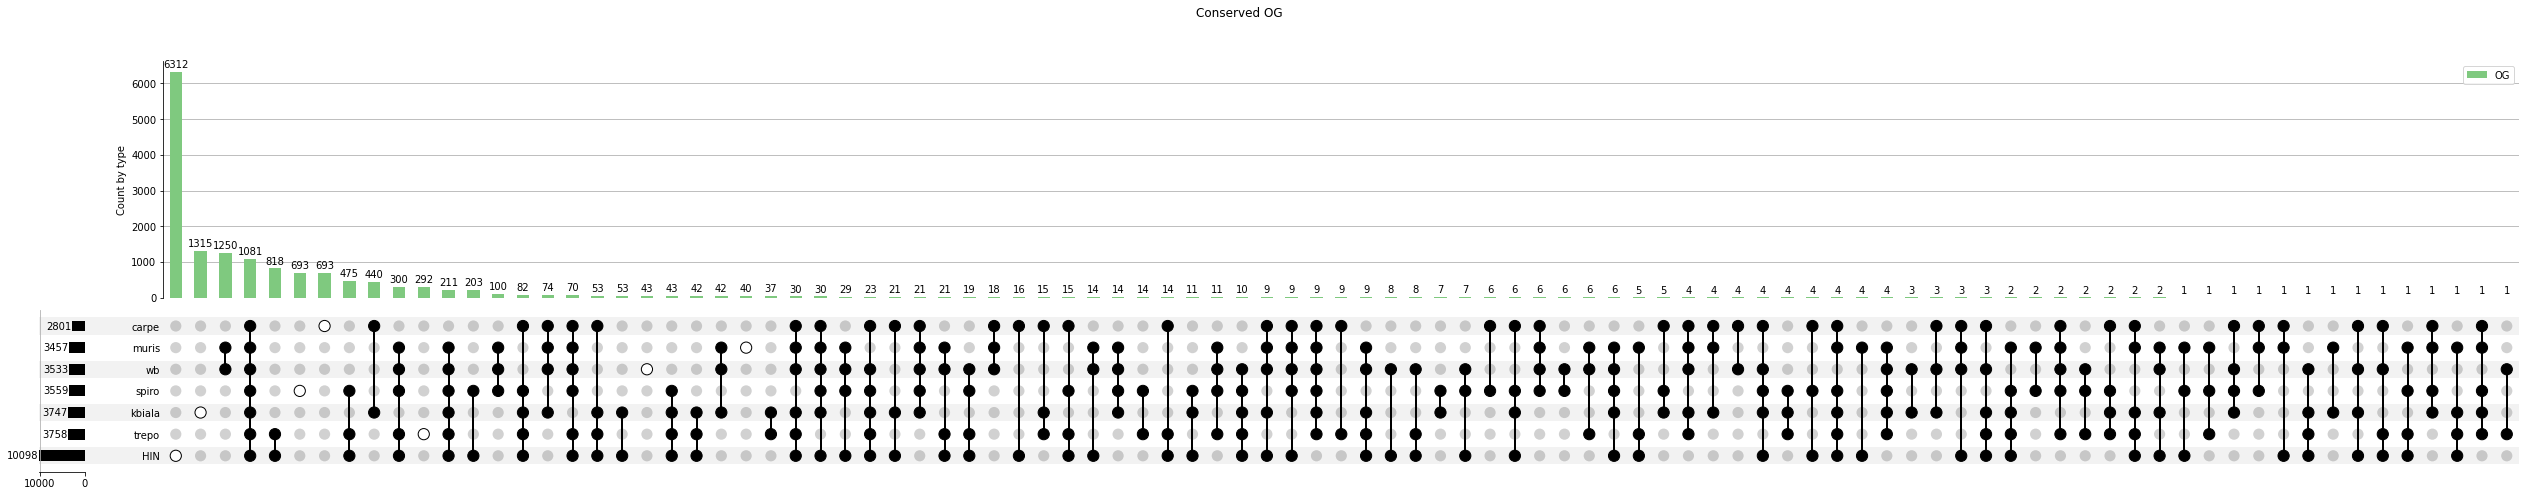

In [32]:
"Upset plot for only OG"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).set_index(df_count.spiro >= 1, append=True).set_index(
    df_count.wb >= 1, append=True).set_index(df_count.muris >= 1, append=True).set_index(df_count.trepo >= 1, append=True
                                                                                             ).set_index(df_count.kbiala >= 1, append=True).set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=0,
              show_counts=True, sort_categories_by="cardinality", sort_by="cardinality")  # disable the default bar chart

upset.add_stacked_bars(by="Type", colors=cm.Accent,
                       title="Count by type", elements=10)

upset.style_subsets(max_degree=1,
                    facecolor="white",
                    edgecolor="black",
                    label="Species-specific")

upset.plot()
plt.suptitle("Conserved OG")
plt.show()

In [ ]:
df